In [ ]:
#Load the SBI Data in jupyter notebook

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns

# Load the SBI dataset
data = pd.read_csv("SBI_Life_insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [2]:
#EDA(exploratory data analysis)
#Understanding the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
data.shape


(1338, 8)

In [5]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
#Cleaninh the data
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
data.nunique()

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

# Numerical Variable are
1.age
2.bmi
3.charges

These are continuous variables((which have infinite values))

In [9]:
data['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [10]:
#age is a continuous variable and it does not make sense to use unique
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [11]:
# bmi is a continuous variable and it does not make sense to use unique
data['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [12]:
# charges is a continuous variable and it does not make sense to use unique
data['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# Categorical variables are
1.region
2.sex
3.children
4.insuranceclaim
5.smoker


sex,insuranceclaim and smoker are nominal variables(which cannot be ordered) and
region and children are ordinal variables(which can be arrange in order)

In [13]:
data['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64

In [14]:
data['region'].unique()

array([3, 2, 1, 0], dtype=int64)

In [15]:
data['sex'].unique()

array([0, 1], dtype=int64)

In [16]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [17]:
data['insuranceclaim'].unique()

array([1, 0], dtype=int64)

In [18]:
data['smoker'].unique()

array([1, 0], dtype=int64)

In [92]:
x=data.iloc[:,5].values
y=data.iloc[:,6].values
print(x[:5])
print(y[:5])

[[19.     0.    27.9    0.     1.   ]
 [18.     1.    33.77   1.     0.   ]
 [28.     1.    33.     3.     0.   ]
 [33.     1.    22.705  0.     0.   ]
 [32.     1.    28.88   0.     0.   ]]
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


In [93]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


#Segregate the input and output variable.
#Feature Selection

In [94]:
corelation =data.corr()

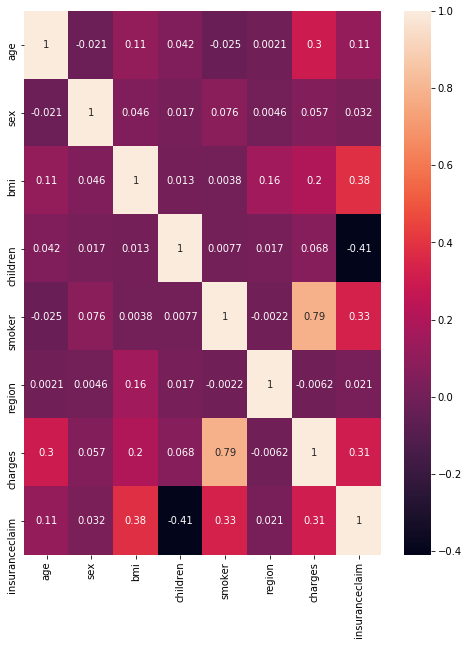

In [95]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

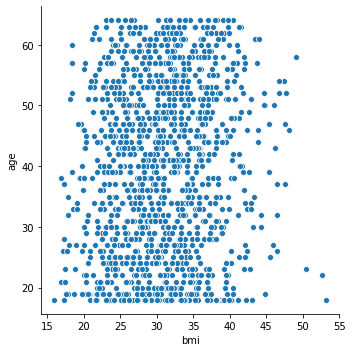

In [96]:
##it shows relationship between numerical variables each member of dataset point 
#whose left parenthesis and right parenthesis coordinates relates to a variables.
sns.relplot(x= 'bmi',y='age',data=data)

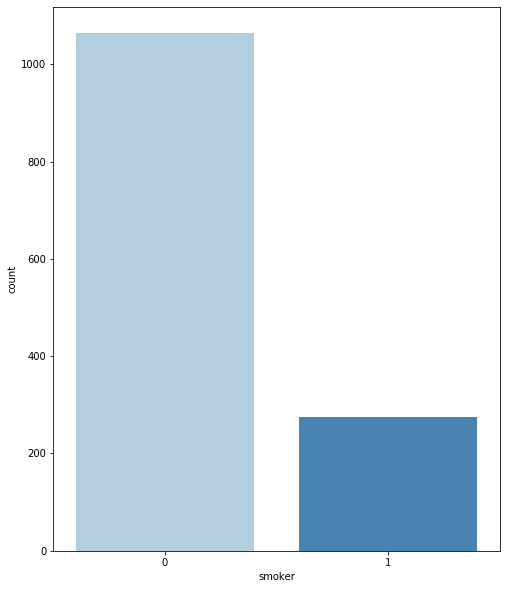

In [100]:
sns.countplot(x='smoker',data=data,palette='Blues')
plt.show()

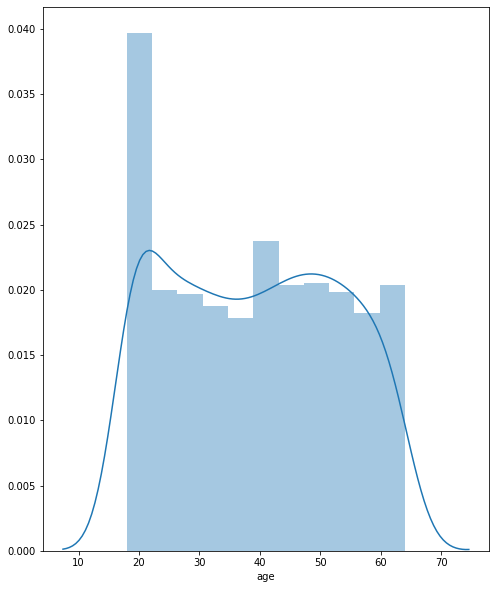

In [98]:
sns.distplot(life['age'])

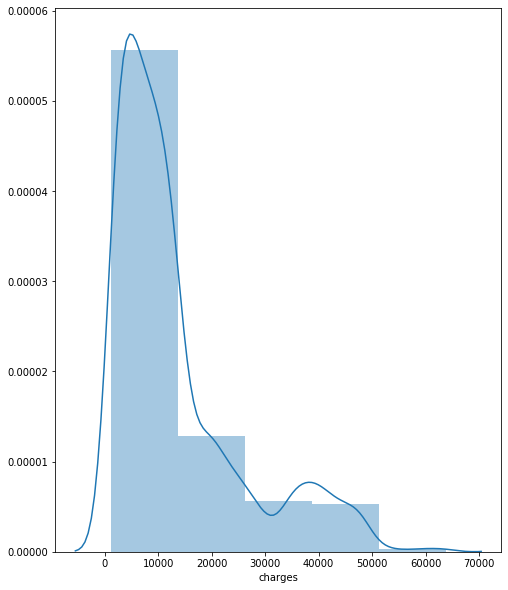

In [97]:
sns.distplot(life['charges'],bins=5)

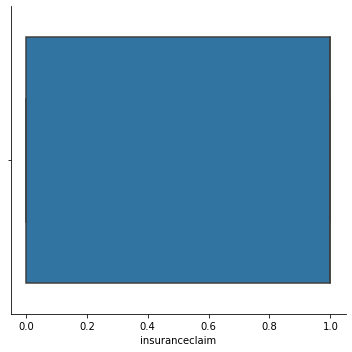

In [99]:
sns.catplot(x='insuranceclaim',kind ='box',data=life)

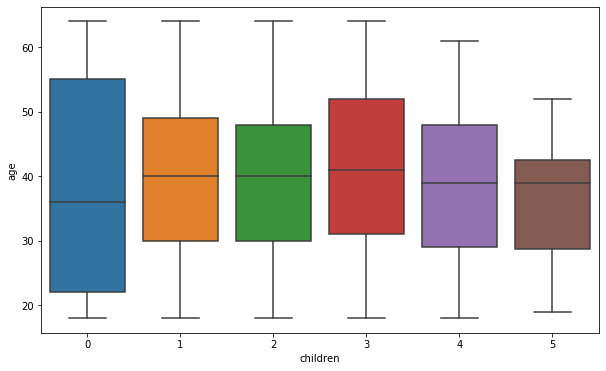

In [133]:
plt.figure(figsize=(10,6))
sns.boxplot(x='children',y='age',data=data)
plt.show()

<Figure size 576x720 with 0 Axes>

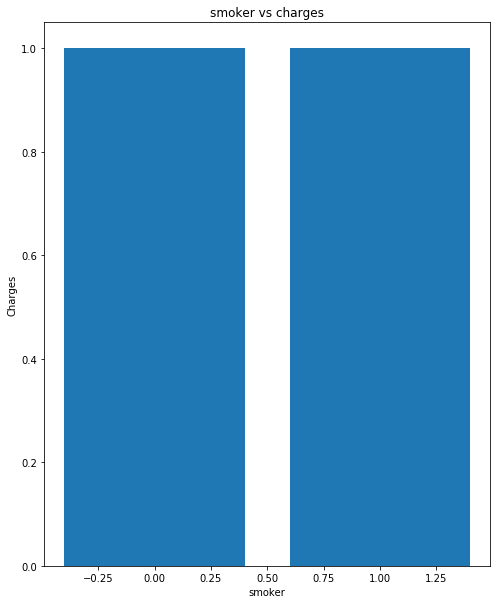

<Figure size 576x720 with 0 Axes>

In [141]:
plt.bar(data['smoker'],y,)
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('smoker vs charges')
plt.figure()

In [131]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1070 samples.
Testing set has 268 samples.


In [117]:
from sklearn.preprocessing import LabelEncoder
label_x= LabelEncoder()
x[:,1]=label_x.fit_transform(x[:,1])
x[:,4]=label_x.fit_transform(x[:,4])
print("The first five row of input variable \n",x[:6])


The first five row of input variable 
 [[19.     0.    27.9    0.     1.   ]
 [18.     1.    33.77   1.     0.   ]
 [28.     1.    33.     3.     0.   ]
 [33.     1.    22.705  0.     0.   ]
 [32.     1.    28.88   0.     0.   ]
 [31.     0.    25.74   0.     0.   ]]


In [ ]:
#Prediction using all appropriate ML algorithms

In [119]:
from sklearn.linear_model import LinearRegression
lin_regressor= LinearRegression()
lin_regressor.fit(x_train,y_train)
y_predict=lin_regressor.predict(x_test)
score=lin_regressor.score(x_test,y_test)
print("Linear Regression Accuracy is",score*100)

Linear Regression Accuracy is 44.63494165785233


In [120]:
from sklearn.ensemble import RandomForestRegressor
rand_regressor= RandomForestRegressor(n_estimators=10,random_state=0)
rand_regressor.fit(x_train,y_train)
score=rand_regressor.score(x_test,y_test)
print("Random Forest Regression Accuracy score is ", score*100)

Random Forest Regression Accuracy score is  97.06267590387529


In [129]:
 


from sklearn.tree import DecisionTreeRegressor
dec_regressor= DecisionTreeRegressor(criterion='mse',random_state=0)
dec_regressor.fit(x_train,y_train)
score=dec_regressor.score(x_test,y_test)
print("Decesion Tree Regression Accuracy score is ", score*100)


Decesion Tree Regression Accuracy score is  100.0
